**Análise de desempenho do modelo PyTorch**
---


---


Nesta lição, aprenderemos a usar o modelo MNIST que treinamos na lição anterior e analisaremos seu desempenho:
1. Configurar nosso modelo e dados do PyTorch
2. Carregar o modelo treinado anteriormente
3. Veja as imagens que classificamos erroneamente
4. Criar uma Matriz de Confusão
5. Criar relatório de classificação

Só precisamos carregar o conjunto de dados de teste, pois estamos analisando o desempenho nesse segmento de dados.

In [1]:

import torch

import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

print("GPU disponível: {}".format(torch.cuda.is_available()))


device = 'cuda'

GPU disponível: True


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def imgshow(title, image = None, size = 6):
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()

In [3]:
# Transforme em um tensor PyTorch e normalize nosso valor entre -1 e +1
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])

# Carregue nossos dados de teste e especifique qual transformação usar ao carregar
testset = torchvision.datasets.MNIST('mnist', 
                                     train = False,
                                     download = True,
                                     transform = transform)

testloader = torch.utils.data.DataLoader(testset,
                                          batch_size = 128,
                                          shuffle = False,
                                          num_workers = 0)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.61MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 197kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 1.87MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 21.2MB/s]


In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### **NOTA**

Ao carregar nosso modelo, precisamos criar a instância do modelo, ou seja, ```net = Net()``` e, em seguida, como o treinamos usando nossa GPU no Colab, nós o movemos para a GPU usando ```net.to(device``` onde device = 'cuda'.

Em seguida, podemos carregar os pesos do nosso modelo baixado. 

In [5]:

net = Net()
net.to(device)


net.load_state_dict(torch.load('mnist_cnn_net.pth'))

<All keys matched successfully>

### Agora vamos calcular sua precisão (feita na lição anterior, portanto, esta é apenas uma recapitulação) nos dados de teste**

In [7]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Acurácia da rede sobre 10000 imagens de teste: {accuracy:.3}%')

Acurácia da rede sobre 10000 imagens de teste: 98.1%


## Exibindo nossas imagens classificadas incorretamente ##

De 10.000 imagens, nosso modelo previu 98,1% de acertos. Isso é bom para uma primeira tentativa com um modelo tão simples. (existem modelos muito melhores).

**Uma boa prática!**

Ao criar classificadores de imagens, é um bom hábito inspecionar visualmente as imagens que estão sendo classificadas incorretamente.
1. Podemos identificar quais tipos de imagens são desafiadores para o nosso modelo
2. Podemos identificar quaisquer imagens rotuladas incorretamente
3. Se, às vezes, não conseguirmos identificar corretamente a classe, ver sua CNN consegue :)

**Lembre-se** do motivo pelo qual usamos ```net.eval()``` e ```torch.no_grad()```

[Taken from Stackoverflow:](https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch)


O **model.eval()** é uma espécie de interruptor para algumas camadas/partes específicas do modelo que se comportam de forma diferente durante o treinamento e o tempo de inferência (avaliação). Por exemplo, **Dropouts** Layers, BatchNorm Layers etc. Você precisa desativá-las durante a avaliação do modelo, e .eval() fará isso para você. Além disso, a prática comum de avaliação/validação é usar torch.no_grad() em conjunto com model.eval() para desativar o cálculo de gradientes.

Portanto, embora não usemos Dropouts ou BatchNorm em nosso modelo, é uma boa prática usá-los ao fazer inferência.


Label real: 9, Label previsto: 4


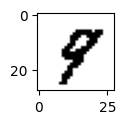

Label real: 4, Label previsto: 2


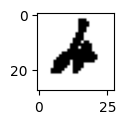

Label real: 6, Label previsto: 0


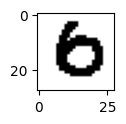

Label real: 2, Label previsto: 7


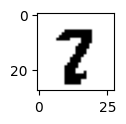

Label real: 5, Label previsto: 3


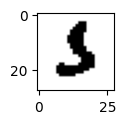

Label real: 6, Label previsto: 0


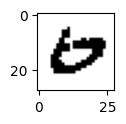

Label real: 3, Label previsto: 5


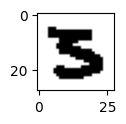

Label real: 8, Label previsto: 2


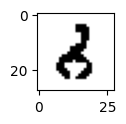

Label real: 8, Label previsto: 2


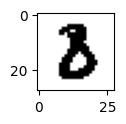

Label real: 1, Label previsto: 8


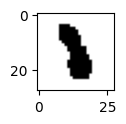

Label real: 2, Label previsto: 1


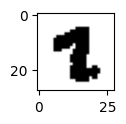

Label real: 7, Label previsto: 3


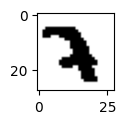

Label real: 0, Label previsto: 6


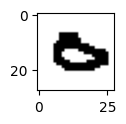

Label real: 5, Label previsto: 8


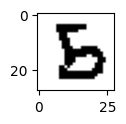

Label real: 4, Label previsto: 9


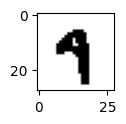

Label real: 8, Label previsto: 7


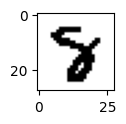

Label real: 7, Label previsto: 9


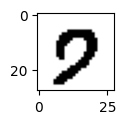

Label real: 9, Label previsto: 7


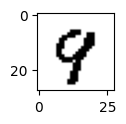

Label real: 3, Label previsto: 5


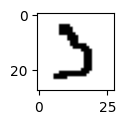

Label real: 8, Label previsto: 9


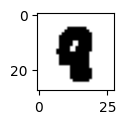

Label real: 1, Label previsto: 2


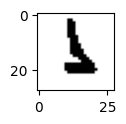

Label real: 6, Label previsto: 0


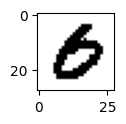

Label real: 6, Label previsto: 5


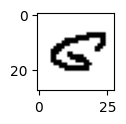

Label real: 7, Label previsto: 2


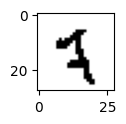

Label real: 6, Label previsto: 8


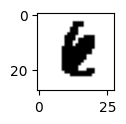

Label real: 8, Label previsto: 4


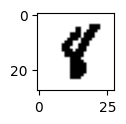

Label real: 7, Label previsto: 8


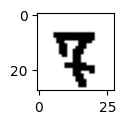

Label real: 6, Label previsto: 8


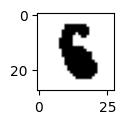

Label real: 7, Label previsto: 2


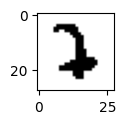

Label real: 9, Label previsto: 4


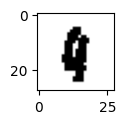

Label real: 9, Label previsto: 5


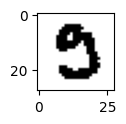

Label real: 7, Label previsto: 1


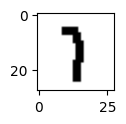

Label real: 5, Label previsto: 7


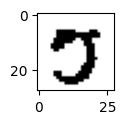

Label real: 8, Label previsto: 0


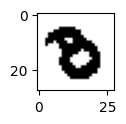

Label real: 7, Label previsto: 2


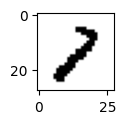

Label real: 8, Label previsto: 2


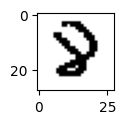

Label real: 5, Label previsto: 3


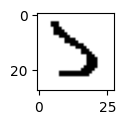

Label real: 9, Label previsto: 4


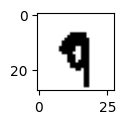

Label real: 7, Label previsto: 1


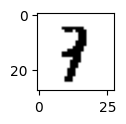

Label real: 7, Label previsto: 9


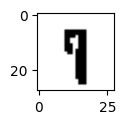

Label real: 1, Label previsto: 6


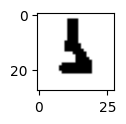

Label real: 8, Label previsto: 7


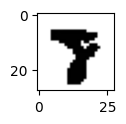

Label real: 9, Label previsto: 3


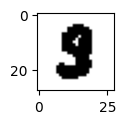

Label real: 6, Label previsto: 4


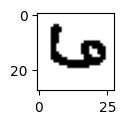

Label real: 0, Label previsto: 6


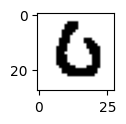

Label real: 2, Label previsto: 0


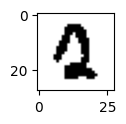

Label real: 3, Label previsto: 7


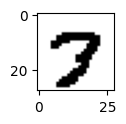

Label real: 9, Label previsto: 5


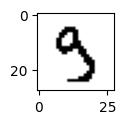

Label real: 8, Label previsto: 0


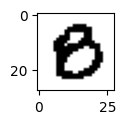

Label real: 7, Label previsto: 2


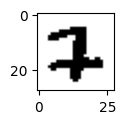

Label real: 1, Label previsto: 6


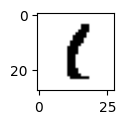

Label real: 2, Label previsto: 8


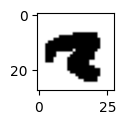

Label real: 8, Label previsto: 3


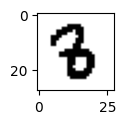

Label real: 9, Label previsto: 4


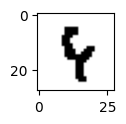

Label real: 7, Label previsto: 2


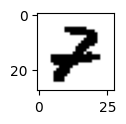

Label real: 1, Label previsto: 7


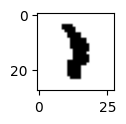

Label real: 7, Label previsto: 9


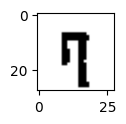

Label real: 5, Label previsto: 3


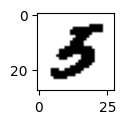

Label real: 4, Label previsto: 8


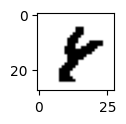

Label real: 7, Label previsto: 4


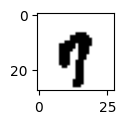

Label real: 2, Label previsto: 0


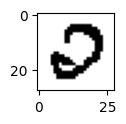

Label real: 6, Label previsto: 0


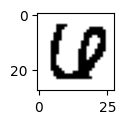

Label real: 9, Label previsto: 2


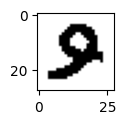

Label real: 4, Label previsto: 9


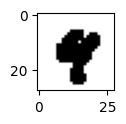

Label real: 6, Label previsto: 1


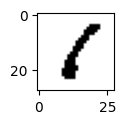

Label real: 1, Label previsto: 2


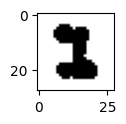

Label real: 9, Label previsto: 1


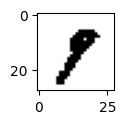

Label real: 1, Label previsto: 2


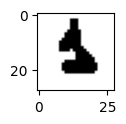

Label real: 8, Label previsto: 0


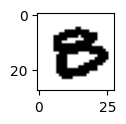

Label real: 3, Label previsto: 5


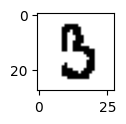

Label real: 9, Label previsto: 6


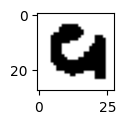

Label real: 9, Label previsto: 1


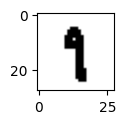

Label real: 9, Label previsto: 1


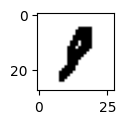

Label real: 9, Label previsto: 4


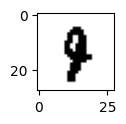

Label real: 6, Label previsto: 8


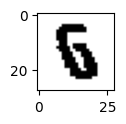

Label real: 2, Label previsto: 4


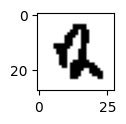

Label real: 7, Label previsto: 2


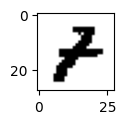

Label real: 6, Label previsto: 1


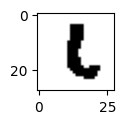

Label real: 9, Label previsto: 4


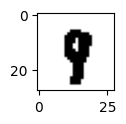

Label real: 9, Label previsto: 4


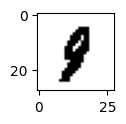

Label real: 2, Label previsto: 3


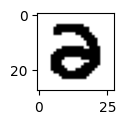

Label real: 8, Label previsto: 0


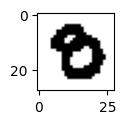

Label real: 3, Label previsto: 2


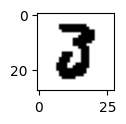

Label real: 9, Label previsto: 7


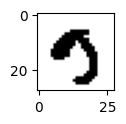

Label real: 3, Label previsto: 5


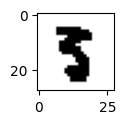

Label real: 9, Label previsto: 7


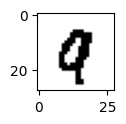

Label real: 6, Label previsto: 8


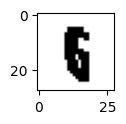

Label real: 9, Label previsto: 7


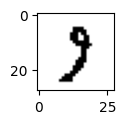

Label real: 1, Label previsto: 2


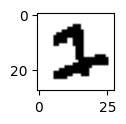

Label real: 8, Label previsto: 3


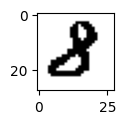

Label real: 7, Label previsto: 4


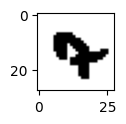

Label real: 6, Label previsto: 0


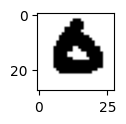

Label real: 9, Label previsto: 1


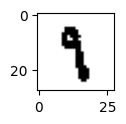

Label real: 6, Label previsto: 4


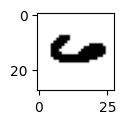

Label real: 5, Label previsto: 0


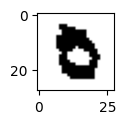

Label real: 9, Label previsto: 3


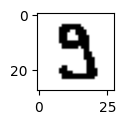

Label real: 7, Label previsto: 0


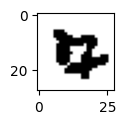

Label real: 4, Label previsto: 9


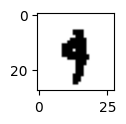

Label real: 7, Label previsto: 2


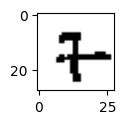

Label real: 8, Label previsto: 3


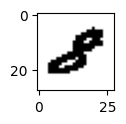

Label real: 7, Label previsto: 2


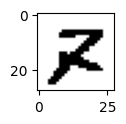

Label real: 4, Label previsto: 2


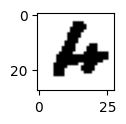

Label real: 7, Label previsto: 8


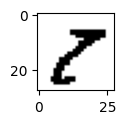

Label real: 7, Label previsto: 8


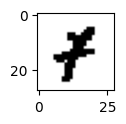

Label real: 9, Label previsto: 4


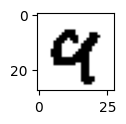

Label real: 6, Label previsto: 2


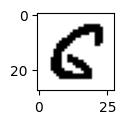

Label real: 9, Label previsto: 4


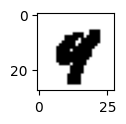

Label real: 1, Label previsto: 3


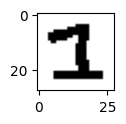

Label real: 4, Label previsto: 2


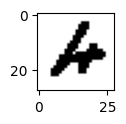

Label real: 7, Label previsto: 1


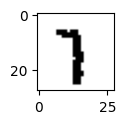

Label real: 7, Label previsto: 9


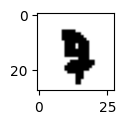

Label real: 0, Label previsto: 2


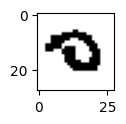

Label real: 8, Label previsto: 0


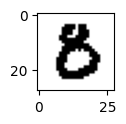

Label real: 9, Label previsto: 7


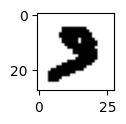

Label real: 7, Label previsto: 9


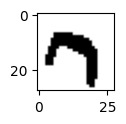

Label real: 9, Label previsto: 0


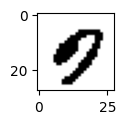

Label real: 2, Label previsto: 7


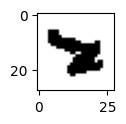

Label real: 2, Label previsto: 6


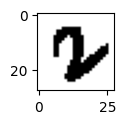

Label real: 9, Label previsto: 7


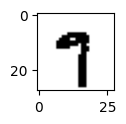

Label real: 7, Label previsto: 3


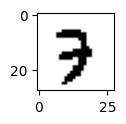

Label real: 2, Label previsto: 4


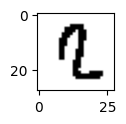

Label real: 3, Label previsto: 2


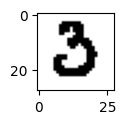

Label real: 2, Label previsto: 7


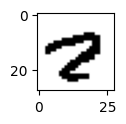

Label real: 9, Label previsto: 4


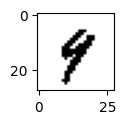

Label real: 7, Label previsto: 1


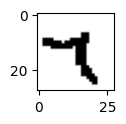

Label real: 9, Label previsto: 1


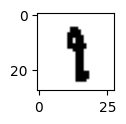

Label real: 6, Label previsto: 5


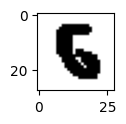

Label real: 6, Label previsto: 8


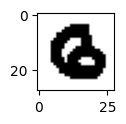

Label real: 2, Label previsto: 4


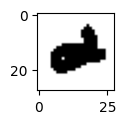

Label real: 8, Label previsto: 9


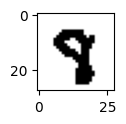

Label real: 3, Label previsto: 5


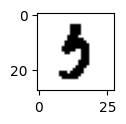

Label real: 9, Label previsto: 8


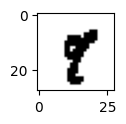

Label real: 8, Label previsto: 0


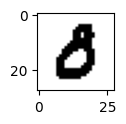

Label real: 6, Label previsto: 0


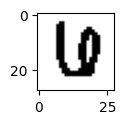

Label real: 9, Label previsto: 4


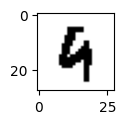

Label real: 0, Label previsto: 8


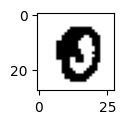

Label real: 8, Label previsto: 4


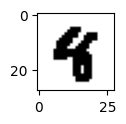

Label real: 1, Label previsto: 6


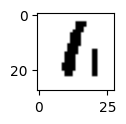

Label real: 7, Label previsto: 4


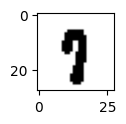

Label real: 2, Label previsto: 3


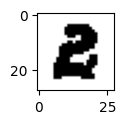

Label real: 1, Label previsto: 8


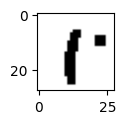

Label real: 7, Label previsto: 0


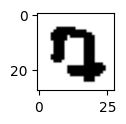

Label real: 5, Label previsto: 3


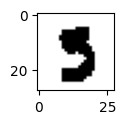

Label real: 3, Label previsto: 8


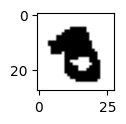

Label real: 3, Label previsto: 8


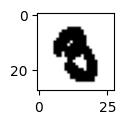

Label real: 5, Label previsto: 9


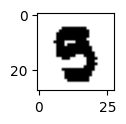

Label real: 9, Label previsto: 5


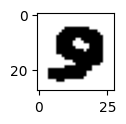

Label real: 9, Label previsto: 3


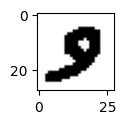

Label real: 9, Label previsto: 5


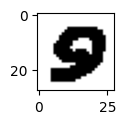

Label real: 9, Label previsto: 0


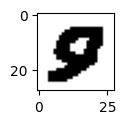

Label real: 9, Label previsto: 0


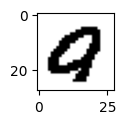

Label real: 9, Label previsto: 7


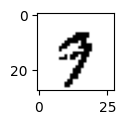

Label real: 7, Label previsto: 1


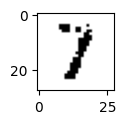

Label real: 0, Label previsto: 7


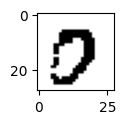

Label real: 8, Label previsto: 2


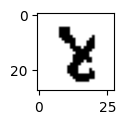

Label real: 0, Label previsto: 4


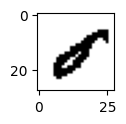

Label real: 1, Label previsto: 6


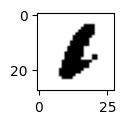

Label real: 6, Label previsto: 4


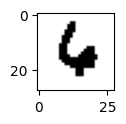

Label real: 7, Label previsto: 2


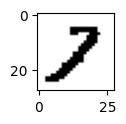

Label real: 4, Label previsto: 8


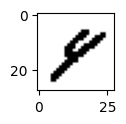

Label real: 7, Label previsto: 4


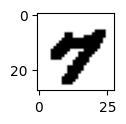

Label real: 5, Label previsto: 8


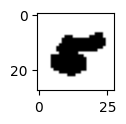

Label real: 2, Label previsto: 4


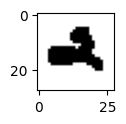

Label real: 2, Label previsto: 1


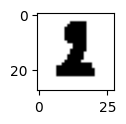

Label real: 2, Label previsto: 1


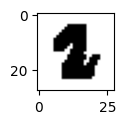

Label real: 2, Label previsto: 1


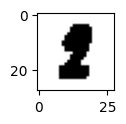

Label real: 8, Label previsto: 5


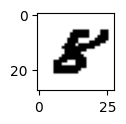

Label real: 3, Label previsto: 9


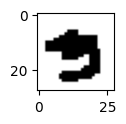

Label real: 6, Label previsto: 4


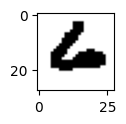

Label real: 8, Label previsto: 6


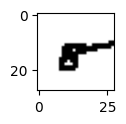

Label real: 7, Label previsto: 2


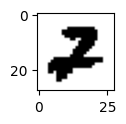

Label real: 7, Label previsto: 2


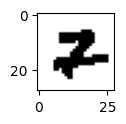

Label real: 7, Label previsto: 2


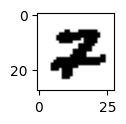

Label real: 7, Label previsto: 2


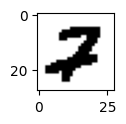

Label real: 7, Label previsto: 2


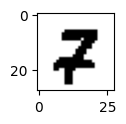

Label real: 1, Label previsto: 8


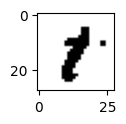

Label real: 9, Label previsto: 7


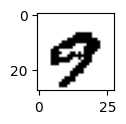

Label real: 2, Label previsto: 7


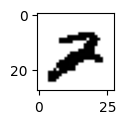

Label real: 9, Label previsto: 7


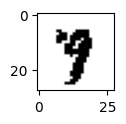

Label real: 5, Label previsto: 6


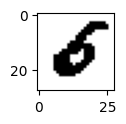

Label real: 9, Label previsto: 7


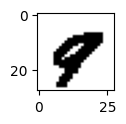

Label real: 5, Label previsto: 6


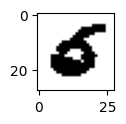

Label real: 5, Label previsto: 0


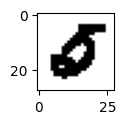

Label real: 2, Label previsto: 3


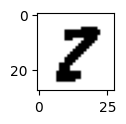

Label real: 2, Label previsto: 7


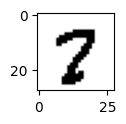

Label real: 9, Label previsto: 5


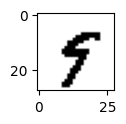

Label real: 0, Label previsto: 2


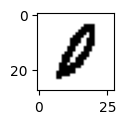

Label real: 5, Label previsto: 6


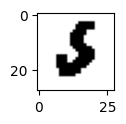

In [ ]:
# Definir o modelo para o modo de avaliação ou inferência
net.eval()

# Não precisamos de gradientes para a validação, portanto, envolva 
# no_grad para economizar memória
with torch.no_grad():
    for data in testloader:
        images, labels = data

        
        images = images.to(device)
        labels = labels.to(device)

        
        outputs = net(images)

        # use torch.argmax() para obter as previsões, argmax é usado para long_tensors
        predictions = torch.argmax(outputs, dim=1)

        # Para os dados de teste em cada batch, identificamos quando as previsões não correspondem à tabela
        # então imprimimos o grouth truth
        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Label real: {label}, Label previsto: {pred}')       
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("", np.uint8(img), size = 1)

# **Criando a matriz de confusão**

Usamos a ferramenta Confusion Matrix da Sklean para criá-la. Tudo o que precisamos é de:
1. Os rótulos verdadeiros
2. Os rótulos previstos


In [9]:
from sklearn.metrics import confusion_matrix


pred_list = torch.zeros(0, dtype=torch.long, device='cpu')
label_list = torch.zeros(0, dtype=torch.long, device='cpu')

with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)

        
        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])
        label_list = torch.cat([label_list, classes.view(-1).cpu()])


conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(conf_mat)

[[ 973    0    2    0    1    0    2    1    1    0]
 [   0 1122    4    1    0    0    4    1    3    0]
 [   2    4 1012    3    4    0    1    5    1    0]
 [   0    0    2  999    0    5    0    1    2    1]
 [   0    0    3    0  974    0    0    0    2    3]
 [   2    0    0    4    0  879    3    1    2    1]
 [   6    2    1    0    4    2  938    0    5    0]
 [   2    5   14    2    4    0    0  993    3    5]
 [   6    0    4    3    2    1    1    2  953    2]
 [   3    5    1    3   11    5    1   10    1  969]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, #matriz de confusão
                          target_names, #classes
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

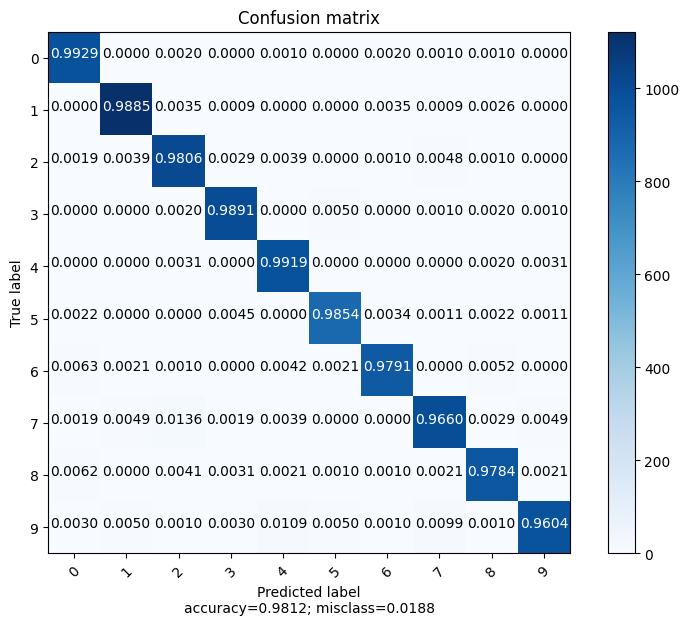

In [11]:
target_names = list(range(0,10))
plot_confusion_matrix(conf_mat, target_names)

In [12]:
# Acurácia por classe
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i,ca) in enumerate(class_accuracy):
    print(f'Acurácia para classe {i} : {ca:.3f}%')

Acurácia para classe 0 : 99.286%
Acurácia para classe 1 : 98.855%
Acurácia para classe 2 : 98.062%
Acurácia para classe 3 : 98.911%
Acurácia para classe 4 : 99.185%
Acurácia para classe 5 : 98.543%
Acurácia para classe 6 : 97.912%
Acurácia para classe 7 : 96.595%
Acurácia para classe 8 : 97.844%
Acurácia para classe 9 : 96.036%


In [13]:
from sklearn.metrics import classification_report

print(classification_report(label_list.numpy(), pred_list.numpy()))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

